In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("cleaned_ebay_deals.csv")



In [3]:
# Display basic info and first few rows
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            836 non-null    object 
 1   title                772 non-null    object 
 2   price                745 non-null    float64
 3   original_price       772 non-null    float64
 4   shipping             836 non-null    object 
 5   item_url             772 non-null    object 
 6   discount_percentage  809 non-null    float64
dtypes: float64(3), object(4)
memory usage: 45.8+ KB


,timestamp,title,price,original_price,shipping,item_url,discount_percentage
0,2025-03-21 13:01:56,Apple iPad 10th Gen 64GB Silver Wi-Fi MPQ03LL/A,238.00,449.0,Free shipping,https://www.ebay.com/itm/125772110133?_trkparm...,46.99
1,2025-03-21 13:01:56,Apple iPhone 14 Pro Max 128GB Network Unlocked...,509.99,1099.0,Shipping info unavailable,https://www.ebay.com/itm/355094939620?_trkparm...,53.60
2,2025-03-21 13:01:56,Apple iPhone 14 Pro Max 256GB Unlocked Very Go...,539.99,1199.0,Shipping info unavailable,https://www.ebay.com/itm/355896538160?_trkparm...,54.96
3,2025-03-21 13:01:56,Apple iPhone 14 Pro A2650 256GB Unlocked Very ...,439.99,999.0,Shipping info unavailable,https://www.ebay.com/itm/355896536737?_trkparm...,55.96
4,2025-03-21 13:01:56,Apple iPhone 13 A2482 128GB Network Unlocked V...,259.99,699.0,Shipping info unavailable,https://www.ebay.com/itm/354393355064?_trkparm...,62.81


<ipython-input-4-9945d56b83c8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deals_per_hour.index, y=deals_per_hour.values, palette="viridis")


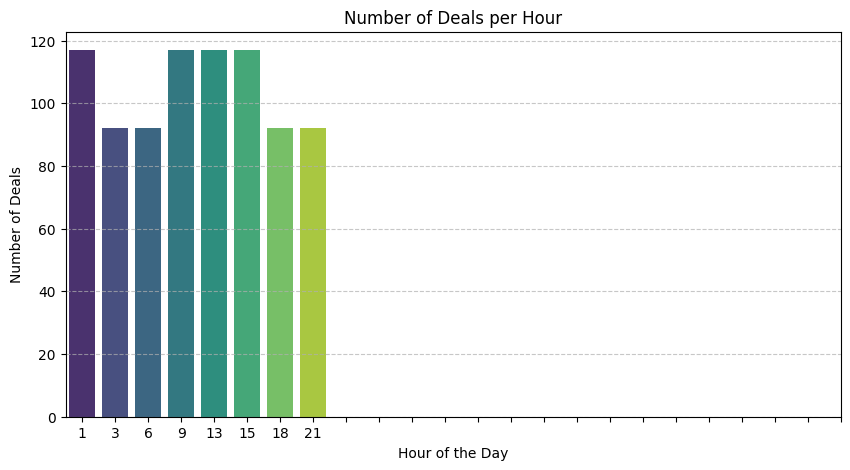

In [4]:
# Convert timestamp to datetime format and extract the hour
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["hour"] = df["timestamp"].dt.hour

# Group by hour and count the number of deals
deals_per_hour = df.groupby("hour").size()

# Plot the number of deals per hour
plt.figure(figsize=(10, 5))
sns.barplot(x=deals_per_hour.index, y=deals_per_hour.values, palette="viridis")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Deals")
plt.title("Number of Deals per Hour")
plt.xticks(range(24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


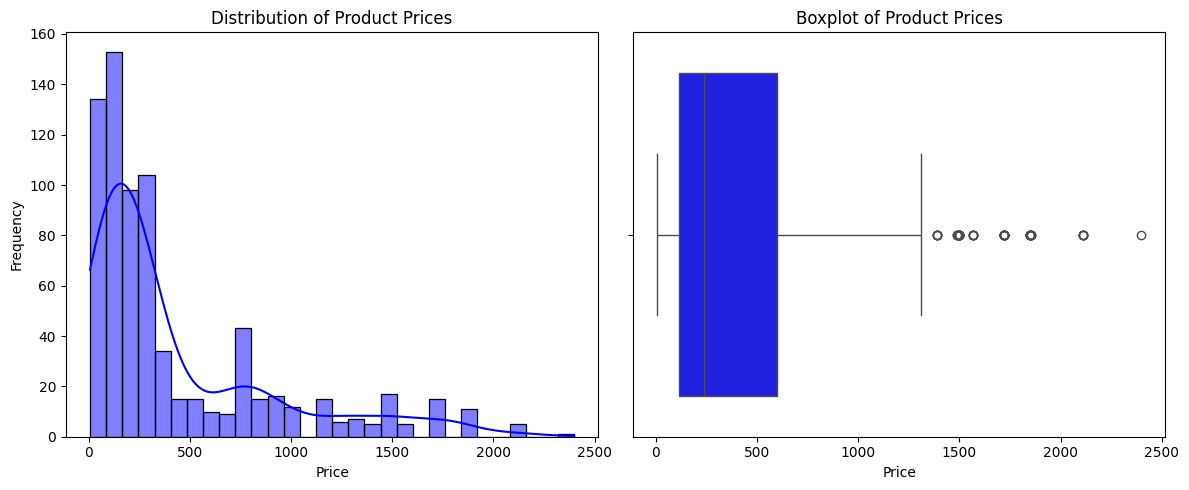

In [5]:
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df["price"], bins=30, kde=True, color="blue")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Product Prices")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df["price"], color="blue")
plt.xlabel("Price")
plt.title("Boxplot of Product Prices")

plt.tight_layout()
plt.show()


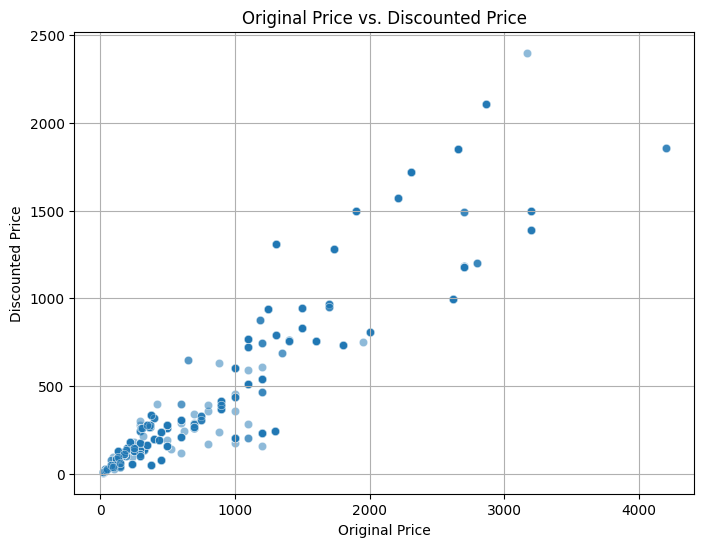

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["original_price"], y=df["price"], alpha=0.5)
plt.xlabel("Original Price")
plt.ylabel("Discounted Price")
plt.title("Original Price vs. Discounted Price")
plt.grid(True)
plt.show()


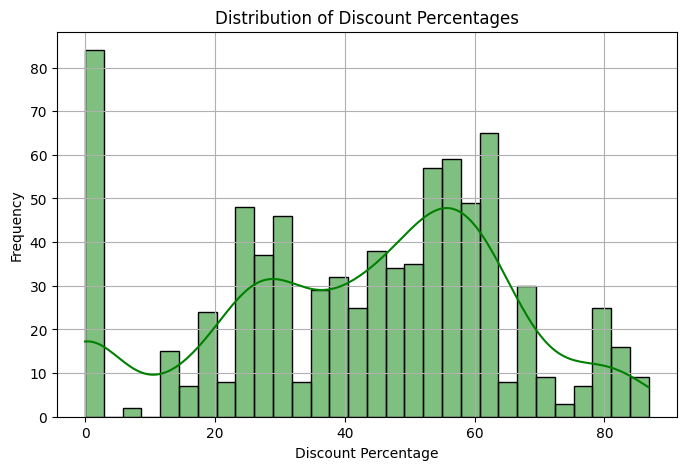

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df["discount_percentage"], bins=30, kde=True, color="green")
plt.xlabel("Discount Percentage")
plt.ylabel("Frequency")
plt.title("Distribution of Discount Percentages")
plt.grid(True)
plt.show()


<ipython-input-8-e67345b98493>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_counts.index, y=shipping_counts.values, palette="coolwarm")


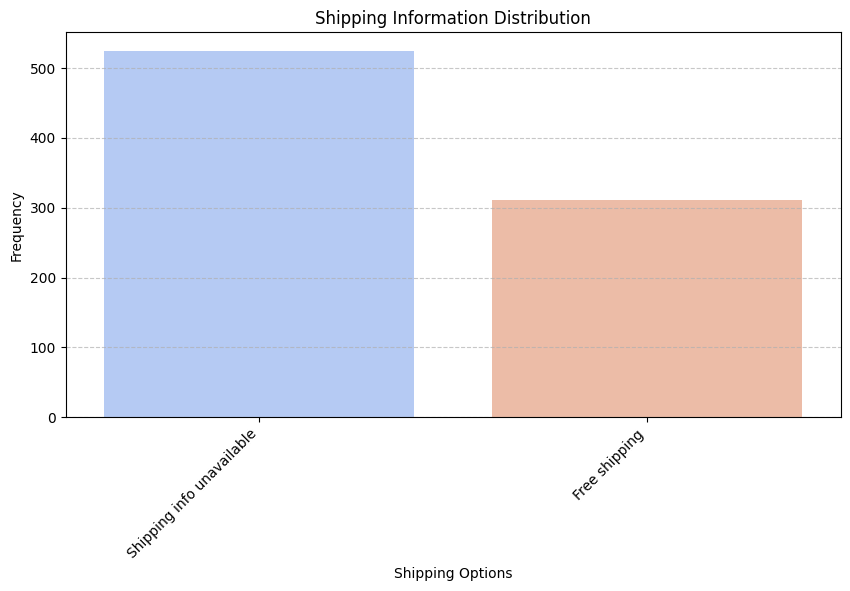

In [8]:
# Count the frequency of different shipping options
shipping_counts = df["shipping"].value_counts()

# Plot the frequency of shipping options
plt.figure(figsize=(10, 5))
sns.barplot(x=shipping_counts.index, y=shipping_counts.values, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Shipping Options")
plt.ylabel("Frequency")
plt.title("Shipping Information Distribution")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


<ipython-input-9-206a8ef159d9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword_df.index, y=keyword_df["Count"], palette="magma")


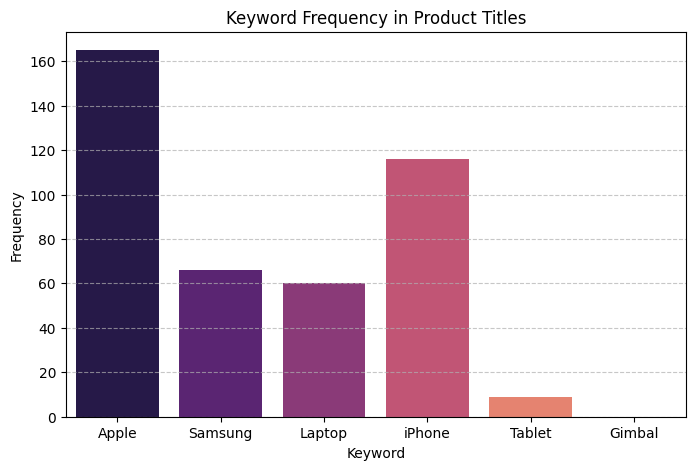

In [9]:
# Define a set of keywords to look for
keywords = ["Apple", "Samsung", "Laptop", "iPhone", "Tablet", "Gimbal"]

# Count occurrences of each keyword (case-insensitive)
keyword_counts = {word: df["title"].str.contains(word, case=False, na=False).sum() for word in keywords}

# Convert to DataFrame for visualization
keyword_df = pd.DataFrame.from_dict(keyword_counts, orient="index", columns=["Count"])

# Plot the keyword frequencies
plt.figure(figsize=(8, 5))
sns.barplot(x=keyword_df.index, y=keyword_df["Count"], palette="magma")
plt.xlabel("Keyword")
plt.ylabel("Frequency")
plt.title("Keyword Frequency in Product Titles")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


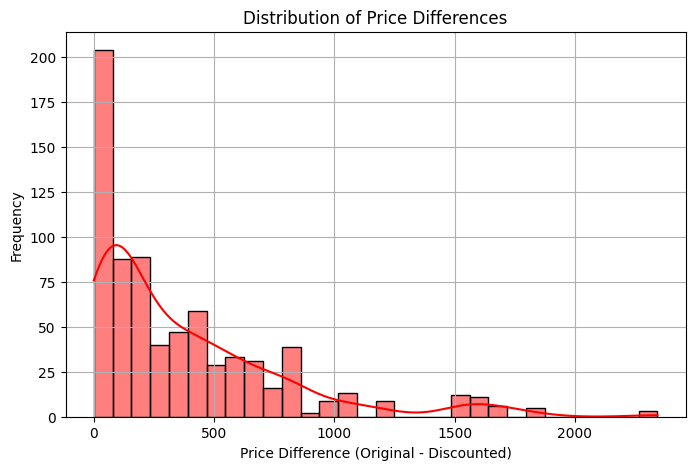

In [10]:
# Compute absolute discount (original_price - price)
df["absolute_discount"] = df["original_price"] - df["price"]

# Plot histogram of absolute discounts
plt.figure(figsize=(8, 5))
sns.histplot(df["absolute_discount"], bins=30, kde=True, color="red")
plt.xlabel("Price Difference (Original - Discounted)")
plt.ylabel("Frequency")
plt.title("Distribution of Price Differences")
plt.grid(True)
plt.show()


In [11]:
# Sort dataset by discount_percentage in descending order
top_discounts = df.sort_values(by="discount_percentage", ascending=False).head(5)

# Display the top 5 deals
top_discounts


,timestamp,title,price,original_price,shipping,item_url,discount_percentage,hour,absolute_discount
829,2025-03-22 09:22:39,Samsung Galaxy Watch4 Classic 46mm R890 GPS - ...,49.99,379.99,Free shipping,https://www.ebay.com/itm/255880698895?_trkparm...,86.84,9,330.0
32,2025-03-21 13:01:58,Samsung Galaxy Watch4 Classic 46mm R890 GPS - ...,49.99,379.99,Free shipping,https://www.ebay.com/itm/255880698895?_trkparm...,86.84,13,330.0
712,2025-03-22 06:30:16,Samsung Galaxy Watch4 Classic 46mm R890 GPS - ...,49.99,379.99,Shipping info unavailable,https://www.ebay.com/itm/255880698895?_trkparm...,86.84,6,330.0
528,2025-03-22 01:48:34,Samsung Galaxy Watch4 Classic 46mm R890 GPS - ...,49.99,379.99,Free shipping,https://www.ebay.com/itm/255880698895?_trkparm...,86.84,1,330.0
620,2025-03-22 03:35:10,Samsung Galaxy Watch4 Classic 46mm R890 GPS - ...,49.99,379.99,Shipping info unavailable,https://www.ebay.com/itm/255880698895?_trkparm...,86.84,3,330.0
